# CLT and LLN

__Purpose:__ The purpose of this lecture is to understand Central Limit Theorem and Law of Large Numbers.

__At the end of this lecture you will be able to:__
> 1. Define the Central Limit Theoreom and Law of Large Numbers 

### 1.1.1 Central Limit Theorem:

__Overview:__ 
- __[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem):__ The Central Limit Theorem is a fundamental concept in Statistics and states that regardless of the original Probability Distribution, if you repeatedly sample from this distribution with sample size n (as n approaches infinity) and then plot the distribution of these sample means, your distribution will approach a Normal Distribution 
> - You can also take the sample sums and then plot the sample sums and the sampling distribution will approach a Normal Distribution
> - As the sample size (n) grows, the distribution of the sample means will approach a more "perfect" Normal Distribution 

__Helpful Points:__
1. We actually observed the Central Limit Theorem in the previous examples where the original distriution was Uniform and after plotting the sample means of 10,000 samples, the distribution looks very normal. This fact is true for any original distribution 
2. Although technically the "perfect" Normal Distribution is only achieved as n approaches infinity, it is sufficient to have a sample size of 5, 10, 25, etc. to achieve an "almost perfect" Normal Distribution 

__Practice:__ Examples of Central Limit Theorem 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1 (Central Limit Theorem - from Exponential Distribution):

In [3]:
# simulate exponential distribution 
beta = 2
num_samples = 100000
exp_data = np.random.exponential(scale = beta, size = num_samples)
exp_data[:10]

array([3.3123009 , 0.64715234, 1.87568896, 1.81780862, 1.65170517,
       0.97008732, 1.90039215, 0.46454969, 1.02772801, 0.99630625])

In [6]:
# make the data into a dataframe to use Pandas sample function 
exponential_data_df = pd.DataFrame(exp_data)
exponential_data_df.columns = ["Population Values"]
exponential_data_df.head(10)

,Population Values
0,3.312301
1,0.647152
2,1.875689
3,1.817809
4,1.651705
5,0.970087
6,1.900392
7,0.464550
8,1.027728
9,0.996306


In [5]:
exp_data.mean() # mu = beta = 2

2.0149399359530835

In [6]:
exp_data.var() # var = beta^2 = 4

4.022259996190369

C:\Users\alish\AppData\Local\Temp\ipykernel_16412\4113213271.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exp_data)


<Axes: ylabel='Density'>

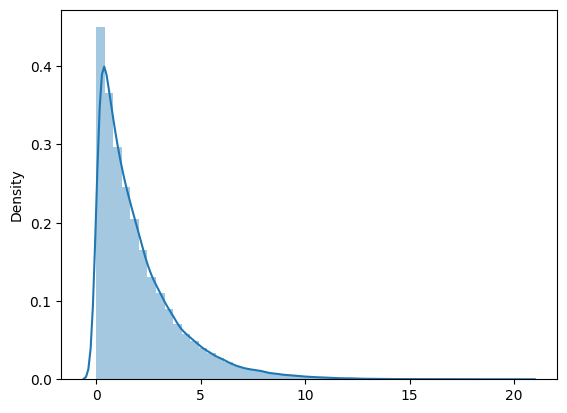

In [7]:
# plot the probability distribution 
sns.distplot(exp_data)

In [4]:
# re-initialize the function, but add in the sum and also allow any data to be passed in 
def sample_distr(n, num_iter, typ, dat):
    sample_stats = []
    for i in range(num_iter):
        sample_i = dat.sample(n, replace = True)
        if typ == "mean":
            sample_i_stat = sample_i.mean()
        elif typ == "range":
            sample_i_stat = sample_i.max() - sample_i.min()
        elif typ == "median":
            sample_i_stat = sample_i.median()
        elif typ == "sum":
            sample_i_stat = sample_i.sum()
        sample_stats.append(sample_i_stat)
    return sample_stats

### Example 1.1 (Sample size of 5, 10000 iterations):

In [5]:
distr_mean = sample_distr(5, 10000, "mean", exponential_data_df) # for mean

NameError: name 'exponential_data_df' is not defined

C:\Users\alish\AppData\Local\Temp\ipykernel_16412\1189286138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distr_mean) # sampling distribution of the sample mean


<Axes: ylabel='Density'>

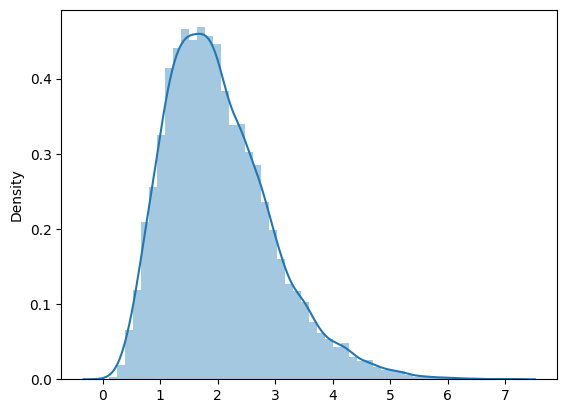

In [10]:
sns.distplot(distr_mean) # sampling distribution of the sample mean 

We see that a sample size of 5 is not large enough to achieve a Normal Distribution of the Sample Means

### Example 1.2 (Sample size of 15, 10000 iterations):

In [12]:
distr_mean = sample_distr(15, 10000, "mean", exponential_data_df) # for mean

C:\Users\alish\AppData\Local\Temp\ipykernel_16412\1189286138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distr_mean) # sampling distribution of the sample mean


<Axes: ylabel='Density'>

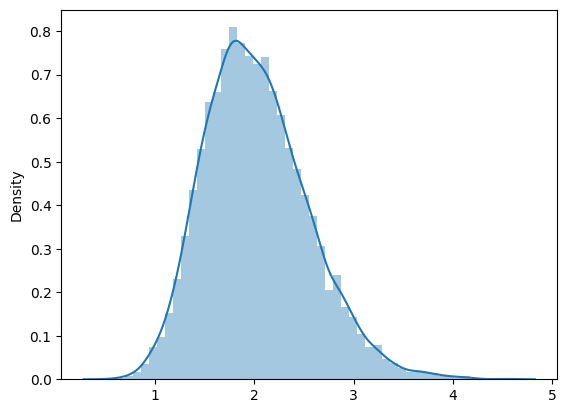

In [13]:
sns.distplot(distr_mean) # sampling distribution of the sample mean 

We see that the distribution is approaching a Normal Distribution, but still quite not there

### Example 1.3 (Sample size of 30, 10000 iterations):

In [14]:
distr_mean = sample_distr(30, 10000, "mean", exponential_data_df) # for mean

C:\Users\alish\AppData\Local\Temp\ipykernel_16412\1189286138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distr_mean) # sampling distribution of the sample mean


<Axes: ylabel='Density'>

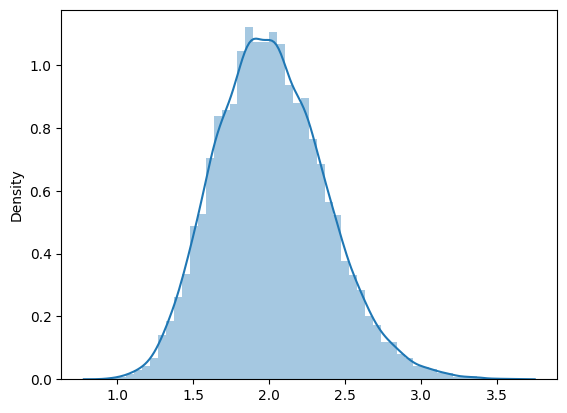

In [15]:
sns.distplot(distr_mean) # sampling distribution of the sample mean 

We see that the distribution is pretty close to a Normal Distribution

### Example 1.3 (Sample size of 100, 10000 iterations):

In [16]:
distr_mean = sample_distr(100, 10000, "mean", exponential_data_df) # for mean

C:\Users\alish\AppData\Local\Temp\ipykernel_16412\1189286138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distr_mean) # sampling distribution of the sample mean


<Axes: ylabel='Density'>

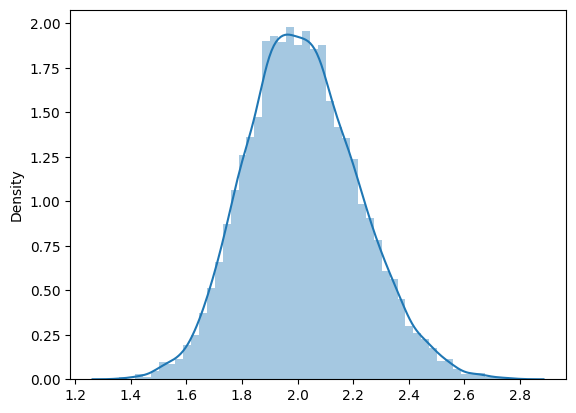

In [17]:
sns.distplot(distr_mean) # sampling distribution of the sample mean 

We see that the distribution is now almost a "perfect" Normal Distribution

In [7]:
distr_sum = sample_distr(100, 10000, "sum", exponential_data_df) # for sum

C:\Users\alish\AppData\Local\Temp\ipykernel_2040\3401990164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distr_sum) # sampling distribution of the sample sum


<Axes: ylabel='Density'>

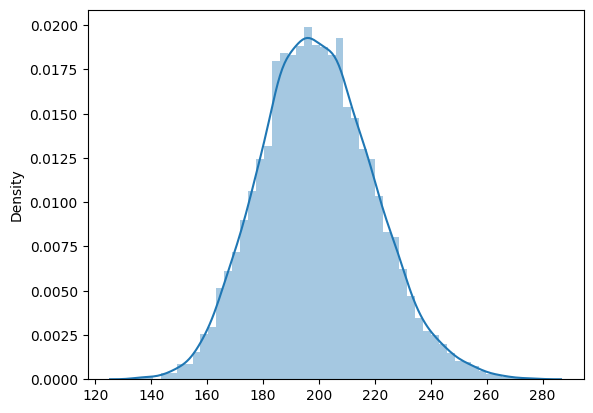

In [8]:
sns.distplot(distr_sum) # sampling distribution of the sample sum

This property clearly works for the sample sum as well. This probability distribution shows the sampling distribution of the sample sums. 

### 1.1.2 Law of Large Numbers:

__Overview:__ 
- __[Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers):__ The Law of Large Numbers states that if you perform an experiment many, many times, the average of these results will approach the expected value of the distribution that was being sampled from or the population parameter 
> - For example, if you roll a die 5 times (n = 5) and average the numbers shown, record this number, then roll the die 10 times (n = 10) and average the numbers shown, record this number, etc. you will find that as you roll the die more times, the average of the numbers shown (as n approaches infinity), will approach the expected value (3.5 for a 6-sided die)

__Helpful Points:__
1. We can formulate the Law of Large Numbers in mathematical notation:
If $X$ is a Random Variable with Expected Value $E[X]$, we can sample from its probability distribution with size n and average the values obtained: 

<center> $\bar X_n = \frac{x_1 + x_2 + ... + x_n}{n}$ </center> 
<center> $\bar X_n \Rightarrow E[X]$ (the sample mean will approach the Expected Value) </center>
<center> $\bar X_n \Rightarrow \mu$ (the sample mean will approach the Population Mean) </center>

2. It should be intuitive that if the number of trials is large enough, you should obtain the expected value or population mean 

__Practice:__ Examples of the Law of Large Numbers in Python 

### Example 1 (Coin Toss):

Let X be a Random Variable that denotes the number of tails after 1000 coin tosses, where the probability of tossing a tails is equal to 0.5. Therefore, the Expected Value is

<center> $E[x] = np = (1000)(0.5) = 500$ </center>

In [20]:
# function to perform an experiment n times, where each iteration involves tossing a coin 'num_tosses' number of times
def coin_toss(n, num_tosses):
    num_tails = []
    for i in range(n):
        flips = []
        for j in range(num_tosses):
            flip = random.randint(0, 1)
            flips.append(flip)
        num_tails.append(np.sum(flips))
    
    sample_mean = np.mean(num_tails)
    return(sample_mean)

In [21]:
coin_toss(10, 1000)

495.2

Performing the experiment 10 times gets us close to the expected value, but not quite

In [22]:
# note: will take a long time to run. Try with a smaller value of n (i.e. 100)
res = []
# collect the sample means for all number of trials from 1 to 1000
for i in range(1,500):
    res.append(coin_toss(i, 100))

Text(0, 0.5, 'Average')

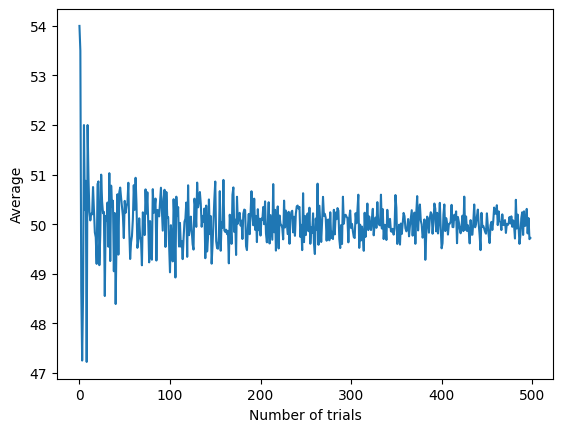

In [23]:
plt.plot(res)
plt.xlabel("Number of trials")
plt.ylabel("Average")

We can see that as the number of trials increase, the sample average approaches the expected value.

### Example 2 (Die Roll):

Let X be a Random Variable that denotes the value of a die roll after 1 toss, where the probability of tossing any given number is equal to 1/6. Therefore, the Expected Value is

<center> $E[x] = (1)(1/6) + (2)(1/6) + (3)(1/6) + (4)(1/6) + (5)(1/6) + (6)(1/6) = 3.5$ </center>

In [24]:
# function to perform an experiment n times, where each iteration involves rolling a die 1 time 
def die_roll(n, output = False):
    rolls = []
    for i in range(n):
        roll = random.randint(1, 6)
        rolls.append(roll)
    
    if output:
        print(rolls)
        
    sample_mean = np.mean(rolls)
    return(sample_mean)

In [25]:
die_roll(10, output = True)

[3, 2, 6, 2, 6, 1, 1, 4, 2, 6]


3.3

Performing the experiment 10 times gets us close to the expected value, but not quite

In [26]:
res = []
# collect the sample means for all number of trials from 1 to 10000
for i in range(1,1000):
    res.append(die_roll(i))

Text(0, 0.5, 'Average')

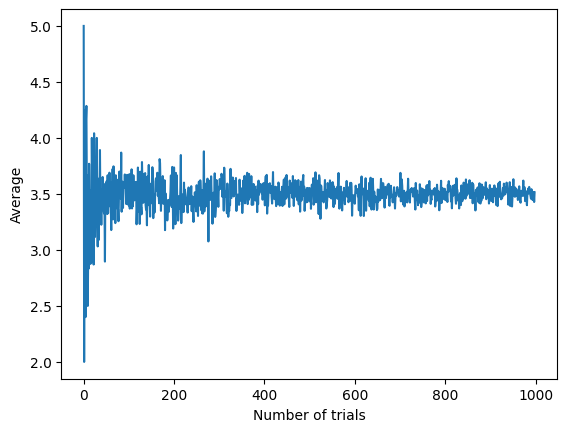

In [27]:
plt.plot(res)
plt.xlabel("Number of trials")
plt.ylabel("Average")

We can see that as the number of trials increase, the sample average approaches the expected value.

NOTE: 

- Beware of the __[Gambler's Fallacy](https://en.wikipedia.org/wiki/Gambler%27s_fallacy):__ which is the mistaken belief that if something happens more frequently at a certain time, then it is bound to happen less frequently in the future 
- It may be easy to think that the Law of Large Numbers is true because in the beginning of the coin tosses if there are many instances of heads, for example, then the later coin tosses will inevitable be tails, making the overall result approach the Expected Value. This is not the case!  